In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

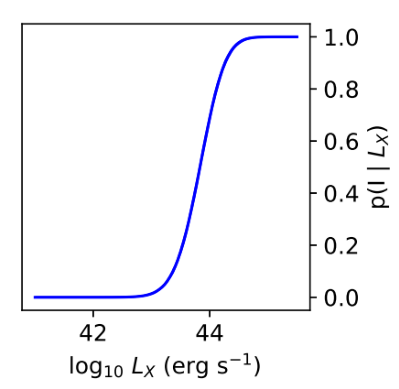

In [2]:
# Load the image
img_path = "figures/eROSITA-selectionfunc.png"
img = Image.open(img_path)

# Display the uploaded plot
plt.imshow(img)
plt.axis("off")
plt.show()

In [3]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


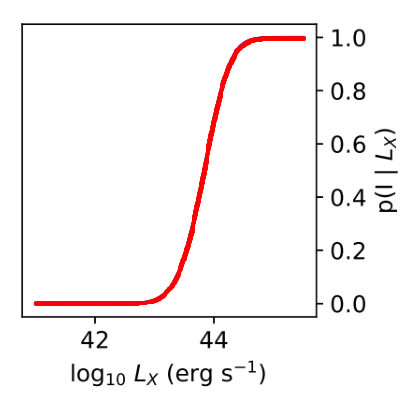

[(np.float64(40.8), np.float64(0.006993006993006978)),
 (np.float64(41.9), np.float64(0.0034965034965035446)),
 (np.float64(43.0), np.float64(0.02447552447552448)),
 (np.float64(43.516666666666666), np.float64(0.23426573426573427)),
 (np.float64(43.75), np.float64(0.4020979020979021)),
 (np.float64(43.95), np.float64(0.6293706293706294)),
 (np.float64(44.18333333333334), np.float64(0.8496503496503497)),
 (np.float64(44.81666666666667), np.float64(0.993006993006993))]

In [4]:
import cv2

# Convert image to array for processing
img_array = np.array(img)

# Convert to grayscale
gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)

# Detect blue line by masking (since the line is blue)
hsv = cv2.cvtColor(img_array, cv2.COLOR_RGB2HSV)
lower_blue = np.array([100, 150, 50])
upper_blue = np.array([140, 255, 255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Get coordinates of blue pixels
ys, xs = np.where(mask > 0)

# Normalize coordinates to [0,1] in image space
x_norm = (xs - xs.min()) / (xs.max() - xs.min())
y_norm = 1 - (ys - ys.min()) / (ys.max() - ys.min())  # flip y-axis

# Scale to axis values (x ~ 41–45, y ~ 0–1)
x_data = 40.8 + x_norm * (45.6 - 40.8)
y_data = y_norm

# Sort by x for clarity
sorted_idx = np.argsort(x_data)
x_data_sorted = x_data[sorted_idx]
y_data_sorted = y_data[sorted_idx]

# Show extracted curve overlay
plt.figure(figsize=(5,5))
plt.imshow(img_array)
plt.scatter(xs, ys, s=1, c="red")
plt.axis("off")
plt.show()

# Return a sample of extracted data points
list(zip(x_data_sorted[::200], y_data_sorted[::200]))[:10]

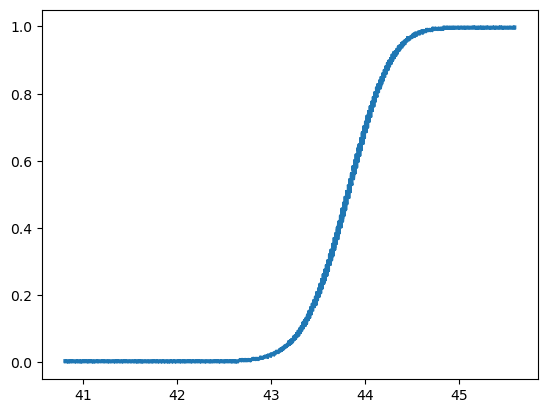

In [5]:
plt.plot(x_data_sorted, y_data_sorted)

In [6]:
import pandas as pd

# Create dataframe with sorted data
df = pd.DataFrame({
    "log10_Lx_erg_s^-1": x_data_sorted,
    "p_I_given_Lx": y_data_sorted
})

# Save to CSV
csv_path = "data/extracted_selectionfunc2.csv"
df.to_csv(csv_path, index=False)

csv_path

'data/extracted_selectionfunc2.csv'